# Project 1: EDA with PySpark

* **Your Group Number:** Group5
* **Each Team Members Name and Student ID:** Vinay Kiran Reddy Chinnakondu(3127565); Likhitha Guggilla(3157108)

By submitting this group work, “I accept responsibility for my role in ensuring the integrity of the work submitted by the group in which I participated.”

[source](https://www.rochester.edu/college/honesty/instructors/pledge.html)

# Introduction

The purpose of this project is to help you apply what you learned in the previous lectures to a real-world dataset. At the end of it, you will have a self-contained notebook that you can brag about in job interviews. I've left some code cells and given some info on dataframe shape to help you check your work...

Now let's go tackle the PPP dataset and find some interesting trends using PySpark!

## Download PPP data

You can download the data from here (https://data.sba.gov/dataset/ppp-foia). We will use the first three files.

I have tried copying the link address and pasting it here (so no need to mount your Google Drive) - but the link address changes every few months, so instead we can download locally, drag to Google Drive, and use a shareable link.

In [1]:
# download the SBA data
# would be great but the link changes every quarter!


!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/0187d0dd-1a59-4c99-a04d-982231e68778/download/public_150k_plus_220930.csv
!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/ef9a027d-6681-4e36-a1d8-82757dd210b4/download/public_up_to_150k_1_220930.csv
!gdown https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/cd9ec3d9-515a-4064-b843-2c22ad9046b4/download/public_up_to_150k_2_220930.csv

Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/0187d0dd-1a59-4c99-a04d-982231e68778/download/public_150k_plus_220930.csv
To: /content/public_150k_plus_220930.csv
100% 6.89k/6.89k [00:00<00:00, 45.6MB/s]
Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/ef9a027d-6681-4e36-a1d8-82757dd210b4/download/public_up_to_150k_1_220930.csv
To: /content/public_up_to_150k_1_220930.csv
100% 6.90k/6.90k [00:00<00:00, 64.9MB/s]
Downloading...
From: https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/cd9ec3d9-515a-4064-b843-2c22ad9046b4/download/public_up_to_150k_2_220930.csv
To: /content/public_up_to_150k_2_220930.csv
100% 6.90k/6.90k [00:00<00:00, 60.0MB/s]


For some reason, I had to upgrade gdown to download a massive .csv file from my Google Drive... run this then try to download the files from your Google Drive!

In [2]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [3]:
# download from Dave's google drive
!gdown 1JGW0DmOkR39tC8DiExRNbAoAsoy7JGwm
!gdown 1pIgGStXobZM9MkenPTduLfGwcJl9xwZh
!gdown 10C_r3jdN4iOb0KmHg7gk3FIS7DMNriaV

Downloading...
From (original): https://drive.google.com/uc?id=1JGW0DmOkR39tC8DiExRNbAoAsoy7JGwm
From (redirected): https://drive.google.com/uc?id=1JGW0DmOkR39tC8DiExRNbAoAsoy7JGwm&confirm=t&uuid=9c44d6f4-c4b1-47ef-9abd-6c3486f6a972
To: /content/public_150k_plus_230101.csv
100% 452M/452M [00:03<00:00, 134MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1pIgGStXobZM9MkenPTduLfGwcJl9xwZh
From (redirected): https://drive.google.com/uc?id=1pIgGStXobZM9MkenPTduLfGwcJl9xwZh&confirm=t&uuid=5e9f7004-5623-4105-b45a-85d705b6b9b7
To: /content/public_up_to_150k_1_230101.csv
100% 413M/413M [00:02<00:00, 146MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=10C_r3jdN4iOb0KmHg7gk3FIS7DMNriaV
From (redirected): https://drive.google.com/uc?id=10C_r3jdN4iOb0KmHg7gk3FIS7DMNriaV&confirm=t&uuid=fd7873fd-6dfc-471d-85a3-45d87516853e
To: /content/public_up_to_150k_2_230101.csv
100% 412M/412M [00:06<00:00, 66.9MB/s]


If you look left, you should be able to see the three big .csv files on the lefthand side.

## Download zipcode-level socioeconomic data
It's generally not known what census tract a business resides in, but the zipcode is almost always known.

This repo (https://github.com/Ro-Data/Ro-Census-Summaries-By-Zipcode) has zipcode-level census attributes. I have downloaded all of the files to our local runtime on the left.

In [4]:
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/econ.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/demo.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/housing.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/rural_urban.txt
!gdown https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/social.txt

Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/econ.txt
To: /content/econ.txt
49.7MB [00:00, 58.1MB/s]
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/demo.txt
To: /content/demo.txt
26.7MB [00:00, 45.6MB/s]
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/housing.txt
To: /content/housing.txt
49.0MB [00:00, 85.9MB/s]
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/rural_urban.txt
To: /content/rural_urban.txt
923kB [00:00, 14.0MB/s]       
Downloading...
From: https://raw.githubusercontent.com/Ro-Data/Ro-Census-Summaries-By-Zipcode/master/social.txt
To: /content/social.txt
46.0MB [00:01, 43.9MB/s]


# Install Spark

In [5]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

# findspark
import findspark
findspark.init()

# Start session

We start the builder pattern `SparkSession.builder` and then chain a configuration parameter that defined the application name.

Providing a useful `appName` helps you identify which programs are running on your Spark cluster.

In [6]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

spark = SparkSession.builder\
        .appName("Project1_EDA_with_PySpark")\
        .getOrCreate()

In [7]:
# for concise script, we import all functions as F
import pyspark.sql.functions as F

# 🔴 Organize your folders (5 pts)

## (1) Create a folder on the local runtime called 'census' and copy all of the .txt files over to this folder
Like we did in class!

In [8]:
# check the working directory
%pwd

'/content'

In [9]:
# make a directory called 'census'
%mkdir /content/census

In [10]:
# move all of the txt files we just downloaded
%mv /content/*.txt /content/census/

## (2) Create a folder on the local runtime called 'PPP' and copy all of the .csv files over to this folder
Like we did in class! Use mv and not cp.

In [11]:
# check the working directory
%pwd

'/content'

In [12]:
# make a directory called PPP
%mkdir /content/PPP/

In [13]:
# move all of the csv files we just downloaded
%mv /content/*.csv /content/PPP/

# 🔴 Clean the PPP data (10 points)

## (1) Append/concatenate all of the PPP csv files together
You should end up with ~2.76M rows and 53 columns if you did it right. You only need one line of code if you use the wildcard. Make sure you print the rows and column count to check your work or points off!

There are zipcode fields for the business and the banks! But be careful, there are null values!

In [14]:
# read all the csv files and append them into a single dataframe
csv_combined = spark.read.option("header", "true").csv('/content/PPP/public_*.csv')

# display the first 5 rows of the appended dataframe
csv_combined.show(n=5)

# print the rows and columns count in the combined dataframe
print((csv_combined.count(),len(csv_combined.columns)))

+----------+------------+-------------+----------------+--------------------+--------------------+----------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+----------------+-----------------+------------+----------+-----+------------+---------+--------------------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+----------+-----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        BorrowerNa

## (2) Clean the zipcode column for PPP files
There are some that are missing and there are some that have a long format (12345-6789).

We only want records where the `BorrowerZip`:
*  zip code exists (is non-null)
*  if it does exist, make return only the first 5 digits (https://www.datasciencemadesimple.com/extract-first-n-and-last-n-character-in-pyspark/)

Now answer:
* How many rows did you drop?
* What percentage of the original data was returned? Do you think this is acceptable data quality?

In [15]:
# drop rows with null values in the 'BorrowerZip' column and standardize zip code format
csv_cleanedzip = (
    csv_combined
    .na.drop(subset=["BorrowerZip"])  # Drop rows with null values in 'BorrowerZip'
    .withColumn("BorrowerZip", csv_combined["BorrowerZip"].substr(1, 5))  # Extract first 5 characters
)

# Display the first 5 rows of the cleaned DataFrame and print its shape
csv_cleanedzip.show(n=5)
print("Rows:", csv_cleanedzip.count(), ", Columns:", len(csv_cleanedzip.columns))

+----------+------------+-------------+----------------+--------------------+--------------------+----------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+----------------+-----------------+------------+----------+-----+------------+---------+--------------------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+----------+-----------+---------+-----------------+---------------+
|LoanNumber|DateApproved|SBAOfficeCode|ProcessingMethod|        BorrowerNa

In [16]:
# Checking the data quality after dropping the null values in BorrowerZip column
rows_dropped = csv_combined.count() - csv_cleanedzip.count()
print(rows_dropped)
retained_data = (csv_cleanedzip.count()/csv_combined.count())*100
print(retained_data)

608
99.97804244020718




*   Number of rows dropped = 608
*   Percentage of original data returned = 99.98% . The data quality is good and acceptable.




# 🔴 Clean up ALL census files (10 points)
Try to use as little code as possible. You should end up with exactly 33120 rows and ~900 columns (depending on if you dropped the dirty zip code column.)

## (1) Read the files

### Table 1

In [17]:
# import the required functions
from pyspark.sql.functions import col, split

text1 = spark.read.text("/content/census/demo.txt") # Read the text file
header_row = text1.first()[0] # Extract the first row to use as header/column names
column_names = header_row.split("\t")  # Split the header by tab

# Filter out the header and split the remaining rows into columns
text1_df = text1.filter(text1["value"] != header_row) \
                 .select(*[split(col("value"), "\t").getItem(i).alias(column_names[i]) for i in range(len(column_names))])

# display the dataframe and print row and column count
text1_df.show(n=7)
print((text1_df.count(),len(text1_df.columns)))


+-----+---------------------------------------+--------------------------------------------+--------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+-----

### Table 2

In [18]:
# Read the text file
text2 = spark.read.text("/content/census/econ.txt")

# Extract the first row to use as header/column names
header_row = text2.first()[0]
column_names = header_row.split("\t")  # split by tab

# Filter out the header and split the remaining rows into columns
text2_df = text2.filter(text2["value"] != header_row) \
                 .select(*[split(col("value"), "\t").getItem(i).alias(column_names[i]) for i in range(len(column_names))])

# display the dataframe and print row and column count
text2_df.show(n=7)
print((text2_df.count(),len(text2_df.columns)))

+-----+---------------------------------------------------------+------------------------------------------------------------------------+------------------------------------------------------------------------+---------------------------------------------------------------------------------+---------------------------------------------------------------------------------+------------------------------------------------------------------+------------------------------------------------------------------+--------------------------------------------------------------------+--------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------+----------------------------------------------------------------------------+----------------------------------------------------------------------------+---------------------------------------------------------

### Table 3

In [19]:
#Read the file
text3 = spark.read.text("/content/census/housing.txt")

# Extract the first row to use as header/column names
header_row = text3.first()[0]
column_names = header_row.split("\t")  # Split by tab

# Filter out the header and split the remaining rows into columns
text3_df = text3.filter(text3["value"] != header_row) \
                 .select(*[split(col("value"), "\t").getItem(i).alias(column_names[i]) for i in range(len(column_names))])

# display the dataframe and print row and column count
text3_df.show(n=7)
print((text3_df.count(),len(text3_df.columns)))

+-----+---------------------------------------------------+--------------------------------------------------------------------------+-----------------------------------------------------------------------+------------------------------------------------------------------------+---------------------------------------------------------------------+--------------------------------------------------------------------------------+-----------------------------------------------------------------------------+----------------------------------------------------+--------------------------------------------------------------------+-----------------------------------------------------------------+--------------------------------------------------------------------+-----------------------------------------------------------------+------------------------------------------------------------+---------------------------------------------------------+--------------------------------------------------

### Table 4

In [20]:
#Read the file
text4 = spark.read.text("/content/census/rural_urban.txt")

# Extract the first row to use as header/column names
header_row = text4.first()[0]
column_names = header_row.split("\t")  # Splitting by tab

# Filter out the header and split the remaining rows into columns
text4_df = text4.filter(text4["value"] != header_row) \
                 .select(*[split(col("value"), "\t").getItem(i).alias(column_names[i]) for i in range(len(column_names))])

# display the dataframe and print row and column count
text4_df.show(n=7)
print((text4_df.count(),len(text4_df.columns)))

+-----+---------------------------------------+---------------------------------------------+---------------------------------------------+--------------------------------------------------------+--------------------------------------------------------+
|ZCTA5|urban_rural-population-total_population|urban_rural-population-urban_total_population|urban_rural-population-rural_total_population|urban_rural-percent-urban_population-of-total_population|urban_rural-percent-rural_population-of-total_population|
+-----+---------------------------------------+---------------------------------------------+---------------------------------------------+--------------------------------------------------------+--------------------------------------------------------+
|00601|                                  18570|                                        10679|                                         7891|                                                   0.575|                                          

### Table 5

In [21]:
#Read the file
text5 = spark.read.text("/content/census/social.txt")

# Extract the first row to use as header/column names
header_row = text5.first()[0]
column_names = header_row.split("\t")  # Splitting by tab

# Filter out the header and split the remaining rows into columns
text5_df = text5.filter(text5["value"] != header_row) \
                 .select(*[split(col("value"), "\t").getItem(i).alias(column_names[i]) for i in range(len(column_names))])

# display the dataframe and print row and column count
text5_df.show(n=7)
print((text5_df.count(),len(text5_df.columns)))

+-----+-----------------------------------+-----------------------------------------------+----------------------------------------------------------------+---------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------+--------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------+---------------------------------------------------------

## (2) Join files together

Hint: everything except the zipcode column should be converted to float... check the schema to be sure...
* https://sparkbyexamples.com/pyspark/pyspark-join-two-or-multiple-dataframes/

In [22]:
# Join all the text files
combined_text = (
    text1_df.join(text2_df, "ZCTA5", "outer")  # join on the 'ZCTA5' column using outer join to retain all information from all the files
    .join(text3_df,"ZCTA5", "outer")
    .join(text4_df,"ZCTA5", "outer")
    .join(text5_df,"ZCTA5", "outer")
)

# Display the combined dataframe and print row and column count
combined_text.show(n=5)
print((combined_text.count(),len(combined_text.columns)))

+-----+---------------------------------------+--------------------------------------------+--------------------------------------------+----------------------------------------------+----------------------------------------------+-----------------------------------------------------+-----------------------------------------------------+----------------------------------------------------+----------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+------------------------------------------------------+-----

In [23]:
# print schema of dataframe to check the datatypes
combined_text.printSchema()

root
 |-- ZCTA5: string (nullable = true)
 |-- sex_and_age-population-total_population: string (nullable = true)
 |-- sex_and_age-population-male_total_population: string (nullable = true)
 |-- sex_and_age-percent-male-of-total_population: string (nullable = true)
 |-- sex_and_age-population-female_total_population: string (nullable = true)
 |-- sex_and_age-percent-female-of-total_population: string (nullable = true)
 |-- sex_and_age-population-under_5_years_total_population: string (nullable = true)
 |-- sex_and_age-percent-under_5_years-of-total_population: string (nullable = true)
 |-- sex_and_age-population-5_to_9_years_total_population: string (nullable = true)
 |-- sex_and_age-percent-5_to_9_years-of-total_population: string (nullable = true)
 |-- sex_and_age-population-10_to_14_years_total_population: string (nullable = true)
 |-- sex_and_age-percent-10_to_14_years-of-total_population: string (nullable = true)
 |-- sex_and_age-population-15_to_19_years_total_population: string (

In [24]:
# without renaming these columns the column conversion to float type is resulting in an error. Hence, renamed them

# Rename two columns to remove '.' in it
combined_text = combined_text.withColumnRenamed(
    'house_heating_fuel-housing_units-fuel_oil_kerosene_etc._occupied_housing_units',
    'house_heating_fuel-housing_units-fuel_oil_kerosene_etc_occupied_housing_units'
).withColumnRenamed(
    'house_heating_fuel-percent-fuel_oil_kerosene_etc.-of-occupied_housing_units',
    'house_heating_fuel-percent-fuel_oil_kerosene_etc-of-occupied_housing_units'
)

# Displaying the renamed columns
combined_text.select('house_heating_fuel-housing_units-fuel_oil_kerosene_etc_occupied_housing_units',
                     'house_heating_fuel-percent-fuel_oil_kerosene_etc-of-occupied_housing_units').show(5)

+-----------------------------------------------------------------------------+--------------------------------------------------------------------------+
|house_heating_fuel-housing_units-fuel_oil_kerosene_etc_occupied_housing_units|house_heating_fuel-percent-fuel_oil_kerosene_etc-of-occupied_housing_units|
+-----------------------------------------------------------------------------+--------------------------------------------------------------------------+
|                                                                         1867|                                                                     0.406|
|                                                                         2614|                                                                     0.466|
|                                                                          273|                                                       0.49200000000000005|
|                                                                     

In [25]:
# convert all the columns except 'ZCTA5' to float type

# import required functions
from pyspark.sql.functions import col
import pyspark.sql.utils


col_string = 'ZCTA5'

for column in combined_text.columns: # for each column in the dataframe
    if column != col_string:
        try:
            combined_text = combined_text.withColumn(column, col(column).cast('float')) # convert the column to float type
        except pyspark.sql.utils.AnalysisException as e: # print this error message if an error occurs during conversion
            print(f"Error processing column '{column}': {str(e)}")

## (3) Check your work

In [26]:
# check the shape of the census dataframe
print(combined_text.count(),len(combined_text.columns))

33120 887


In [27]:
# check the schema (datatype of all the columns except zipcode should be float)
combined_text.printSchema()

root
 |-- ZCTA5: string (nullable = true)
 |-- sex_and_age-population-total_population: float (nullable = true)
 |-- sex_and_age-population-male_total_population: float (nullable = true)
 |-- sex_and_age-percent-male-of-total_population: float (nullable = true)
 |-- sex_and_age-population-female_total_population: float (nullable = true)
 |-- sex_and_age-percent-female-of-total_population: float (nullable = true)
 |-- sex_and_age-population-under_5_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-under_5_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-5_to_9_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-5_to_9_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-10_to_14_years_total_population: float (nullable = true)
 |-- sex_and_age-percent-10_to_14_years-of-total_population: float (nullable = true)
 |-- sex_and_age-population-15_to_19_years_total_population: float (nullable = t

In [28]:
# cross-checking the column datatypes
for column_name, column_type in combined_text.dtypes:
    if column_type != 'float':
        print(column_name)


ZCTA5


To get full credit, you should have:
* (33120, ~900)
* All numeric columns (except for the clean zipcode column which should be a string - state why this column must be a string!)

# 🔴 Analysis Questions (70 points)

10 pts each.

## (1) Join the combined census data to the PPP data based on the zipcode

Let's call this new file `df`. Use `df` for all future analysis questions.

In [29]:
# join the census and PPP data
df = csv_cleanedzip.join(combined_text, csv_cleanedzip.BorrowerZip == combined_text.ZCTA5, 'outer') # join on zipcode using out join to retain all the information from two files

# display the combined dataframe and print row and column count
df.show(n=5)
print((df.count(),len(df.columns)))

+----------+------------+-------------+----------------+--------------------+--------------------+------------+-------------+-----------+--------------+------------+----+---------------------+---------------------+---------------------+-----------------+-------------+-------------------------+--------------------+----------------------+-------------------+--------------------+------------------+-------------------+----------------+------------+----------------------+-----------+-----------------+------------+----------+-----+------------+---------+----------+--------------------+-----------------+---------------+-------------------------+------------+----------------------+-------------------+---------------------+--------------------+---------------------------+--------------------+---------------------+----------------------+----------+-----------+---------+-----------------+---------------+-----+---------------------------------------+--------------------------------------------+---

## (2) Identify the Top 10 states that received loans

Defined as the sum of funds per State across all records. You will need to recode this column because it is categorical data. Use the upper limit of each range and make sure it is NUMERIC data.

In [30]:
# retrieve the values in CurrentApprovalAmount column
df.select('CurrentApprovalAmount').show(5)

# the values are not in range format

+---------------------+
|CurrentApprovalAmount|
+---------------------+
|              5258530|
|              2721700|
|              2000000|
|               996800|
|               675840|
+---------------------+
only showing top 5 rows



In [31]:
# retrieve the data type of the column "CurrentApprovalAmount"
data_type = df.select("CurrentApprovalAmount").dtypes
print(data_type)

[('CurrentApprovalAmount', 'string')]


In [32]:
# convert the "CurrentApprovalAmount" column to float
df = df.withColumn("CurrentApprovalAmount", col("CurrentApprovalAmount").cast('float'))
df.select('CurrentApprovalAmount')

DataFrame[CurrentApprovalAmount: float]

In [33]:
# identify the top 10 states that received loans

# import required functions
from pyspark.sql.functions import col, sum, desc # max, expr,

# group by State and calculate the sum of funds
top10_Borrowerstates = (
    df.groupBy('BorrowerState') # group by state
    .agg(sum('CurrentApprovalAmount') # aggregate the loan amount received by each state
    .alias('TotalFunds')) # rename the aggregated column as TotalFunds
    .orderBy(col('TotalFunds').desc()) # sort DataFrame by TotalFunds in descending order
    .limit(10) # select the top 10 records
)

# display the results
top10_Borrowerstates.show(truncate = False)

+-------------+---------------------+
|BorrowerState|TotalFunds           |
+-------------+---------------------+
|CA           |1.0315804092283537E11|
|NY           |4.2000303506421875E10|
|TX           |4.0222934522390625E10|
|FL           |2.8194733216921875E10|
|IL           |2.3202992045765625E10|
|PA           |2.1349754679765625E10|
|OH           |1.8559222771640625E10|
|NJ           |1.7427779805171875E10|
|MI           |1.6384077707234375E10|
|CO           |1.5060010392714905E10|
+-------------+---------------------+



## (3) Identify the Top 10 banks that loaned money
Defined as the sum of loaned funds per State across all records. Are many of the banks who loaned the most money in the same State?

Again, make sure you are using the numeric version of this categorical column!

In [34]:
# identify the top 10 banks(lenders) that loaned money
top10_Lenderstates= (
    df.groupBy("OriginatingLenderState","OriginatingLender") # group by state and bank
    .agg(sum("CurrentApprovalAmount")  # aggregate the amount loaned by each lender per state
    .alias("TotalLoanedAmount")) # rename the aggregated column as TotalLoanedAmount
    .orderBy(desc("TotalLoanedAmount")) # sort the results by TotalLoanedAmount in descending order
    .limit(10) # select the top 10 records
)

# display the results
top10_Lenderstates.show(truncate = False)

+----------------------+-----------------------------------------+---------------------+
|OriginatingLenderState|OriginatingLender                        |TotalLoanedAmount    |
+----------------------+-----------------------------------------+---------------------+
|OH                    |JPMorgan Chase Bank, National Association|3.1529343479298096E10|
|NC                    |Bank of America, National Association    |2.519360266635132E10 |
|DE                    |PNC Bank, National Association           |1.3466438390734375E10|
|NC                    |Truist Bank                              |1.2411706022678467E10|
|NY                    |Manufacturers and Traders Trust Company  |1.0901213110384766E10|
|SD                    |Wells Fargo Bank, National Association   |9.662802089121094E9  |
|OH                    |KeyBank National Association             |9.113303359088867E9  |
|UT                    |Zions Bank, A Division of                |8.597469000685852E9  |
|OH                  



*  Many of the banks(3) who loaned the most money are in the **Ohio** state





## (4) Which banks loaned the most money to businesses that were in the same State?
You will need to do a logical statement here! For example, given that a bank is headquarted in CT, how much money was loaned to CT businesses by this bank?

Generalize to all banks and businesses where this is true, then sort from high to low (return the top 10.)

In [35]:
top_same_state_lenders = (
    df.filter(col("OriginatingLenderState") == col("BorrowerState")) # Filter for records where the lender's state matches the borrower's state
    .groupBy("OriginatingLender", "OriginatingLenderState") # group by state and lender
    .agg(sum("CurrentApprovalAmount") # aggregate the loan amounts for each lender within the same state
    .alias("TotalLoanedAmount")) # rename the aggregated column as TotalLoanedAmount
    .orderBy(desc("TotalLoanedAmount")) # sort the results by loan amount
    .limit(10) # select the top 10 records
)
# Show the result
top_same_state_lenders.show(truncate = False)

+---------------------------------------+----------------------+--------------------+
|OriginatingLender                      |OriginatingLenderState|TotalLoanedAmount   |
+---------------------------------------+----------------------+--------------------+
|City National Bank                     |CA                    |4.5722114298063965E9|
|Manufacturers and Traders Trust Company|NY                    |4.003545698484375E9 |
|Frost Bank                             |TX                    |3.588387734296875E9 |
|The Huntington National Bank           |OH                    |3.26970364146875E9  |
|Bank of the West                       |CA                    |2.8896981181171875E9|
|MUFG Union Bank, National Association  |CA                    |2.880900688368286E9 |
|Signature Bank                         |NY                    |2.2491512203125E9   |
|Truist Bank                            |NC                    |2.124761042046875E9 |
|East West Bank                         |CA           

## (5) Which zipcodes received the most funding per capita?
This requires you to calculate the sum of funds per zipcode and then divide by the population per zipcode, then sort from high to low.

Make sure you use the clean 5 digit zip code!

In [40]:
# calculate the loan amount by zipcode
funded_df = (
    df.groupBy('BorrowerZip') # group by zipcode
    .agg(sum('CurrentApprovalAmount').cast("float") # aggregate the loan amount by zipcode
    .alias('total_funded')) # rename the aggregated column as total_funded
)

# Calculate the population by zipcode
population_df = (
    df.groupBy('BorrowerZip') # group by zipcode
    .agg(sum('sex_and_age-population-total_population').cast("float") # aggregate the population by zipcode
    .alias('total_zipcodePop')) # rename the aggregated column as total_population
)

In [57]:
# join the funded_df and population_df on BorrowerZip
joined_df = funded_df.join(population_df, on='BorrowerZip', how = 'inner') # use inner join
joined_df.show(n=5)

In [42]:
# Calculate the funding per capita
funded_per_capita_df = joined_df.select(
    'BorrowerZip',
    (joined_df.total_funded / joined_df.total_zipcodePop).alias('funding_per_capita')
)

# Sort by funding per capita in descending order
sorted_df = funded_per_capita_df.sort(col('funding_per_capita').desc())

# Show the results
sorted_df.show()

+-----------+------------------+
|BorrowerZip|funding_per_capita|
+-----------+------------------+
|      06856|181158.55555555556|
|      18454|       169749.9375|
|      20118|142707.57142857142|
|      55111|133588.69444444444|
|      32830| 99510.02097902098|
|      38704|           98000.0|
|      11556| 76147.25714285714|
|      99706|      73351.453125|
|      79085| 70547.36842105263|
|      54643|           69800.0|
|      00951|        62846.2375|
|      64065|59266.666666666664|
|      17507| 56782.01388888889|
|      42603|43657.307692307695|
|      89402|43280.357142857145|
|      18105|42895.454545454544|
|      19735|           42690.0|
|      17254|      42535.459375|
|      14539| 40214.50537634409|
|      40110|           37512.5|
+-----------+------------------+
only showing top 20 rows



## (6) What is the top industry (NAICS codes) in the top 100 zip codes that received money?
Top 100 zip codes meaning the zip codes that borrowed the most money. I want the most common NAICS code per zip code. Show all 100 rows then sum per NAICS to describe overall trends.

This one is tricky!

In [43]:
# find the top 100 zipcodes that recievd money
top_100_zipcodes = (
    df.groupBy("BorrowerZip") # group by zipcode
    .agg(sum("CurrentApprovalAmount").cast('float') # aggregate the loan amount by zipcode
    .alias("TotalReceived")) # rename the aggregated column as TotalReceived
    .sort(col("TotalReceived").desc()).limit(100) # Sort by TotalReceived in descending order and limit to the top 100 zip codes
)

# display the result
top_100_zipcodes.show()

+-----------+-------------+
|BorrowerZip|TotalReceived|
+-----------+-------------+
|      10018| 1.49134374E9|
|      10001| 1.34205862E9|
|      10017|  8.2087059E8|
|      10022|  8.1856237E8|
|      10016|  7.6955373E8|
|      92618|  7.5539283E8|
|      10036|  6.9975891E8|
|      60606|  6.5429824E8|
|      10019|  6.2203648E8|
|      11101|  6.1455712E8|
|      80202|  5.9290726E8|
|      92121|      5.824E8|
|      92101|  5.7895898E8|
|      10013|   5.648295E8|
|      94103|  5.5582144E8|
|      94538|  5.5518509E8|
|      80112|  5.5361165E8|
|      92660| 5.33125024E8|
|      10010| 5.30672288E8|
|      92626|  5.2552768E8|
+-----------+-------------+
only showing top 20 rows



In [44]:

# df = df.withColumn("BorrowerZip", df["BorrowerZip"].cast("string"))
# top_100_zipcodes = top_100_zipcodes.withColumn("BorrowerZip", top_100_zipcodes["BorrowerZip"].cast("string"))

In [45]:
#filtered_df = df.join(top_100_zipcodes, "BorrowerZip")
#filtered_df.show()

In [46]:
# find the most common NAICS codes in the top 100 zip codes

# filter the original dataset to only include entries from these top 100 zip codes
top_100_zipcodes_list = [row['BorrowerZip'] for row in top_100_zipcodes.collect()]
filtered_df_3 = df.filter(df['BorrowerZip'].isin(top_100_zipcodes_list))

# group by zip code and NAICS code within the filtered dataset
naics_counts_per_zip_1 = (
    filtered_df_3.groupBy("BorrowerZip", "NAICSCode") # group by zipcode and NAICS code
    .agg(sum("CurrentApprovalAmount").cast("float") # aggregate the loan amount received by zipcode and NAICS code
    .alias("MoneyReceived")) # rename the aggregated column as MoneyReceived
)


In [47]:
# for each zip code, find the NAICS code with the highest count (most common)

from pyspark.sql.window import Window
from pyspark.sql.functions import rank

windowSpec = Window.partitionBy("BorrowerZip").orderBy(desc("MoneyReceived"))
ranked_naics_per_zip_1 = naics_counts_per_zip_1.withColumn("rank", rank().over(windowSpec)).filter(col("rank") == 1) # use window functions to rank NAICS codes by count

# aggregate the data by NAICS code to describe overall trends
overall_trends_1 = (
    ranked_naics_per_zip_1.groupBy("NAICSCode")
    .count()
    .orderBy(desc("count"))
)

# display the results
ranked_naics_per_zip_1.show(truncate=False)
overall_trends_1.show(truncate=False)

+-----------+---------+-------------+----+
|BorrowerZip|NAICSCode|MoneyReceived|rank|
+-----------+---------+-------------+----+
|22314      |813920   |3.0128286E7  |1   |
|80301      |722511   |3.519464E7   |1   |
|85251      |722511   |5.179718E7   |1   |
|94107      |511210   |2.4334292E7  |1   |
|60173      |541511   |1.6546338E7  |1   |
|10012      |722511   |9.3933584E7  |1   |
|94104      |541110   |4.3118704E7  |1   |
|48083      |561311   |2.6868202E7  |1   |
|10010      |722511   |5.5313348E7  |1   |
|60654      |722511   |6.3721348E7  |1   |
|91311      |238210   |1.4592589E7  |1   |
|75024      |722511   |3.0978344E7  |1   |
|91761      |813990   |9233368.0    |1   |
|96819      |238210   |1.2026056E7  |1   |
|94612      |541110   |3.2252198E7  |1   |
|92612      |721110   |4.1115896E7  |1   |
|90058      |424330   |4.30584E7    |1   |
|94520      |541330   |2.0738196E7  |1   |
|33309      |541990   |1.5414504E7  |1   |
|60606      |541110   |1.17259568E8 |1   |
+----------

## (7) What are the socioeconomic characteristics of the top 100 zip codes? How do they relate to loan amounts?

Select two census variables that look interesting to you.

Create histograms or scatterplots of those interesting socioeconomic variables with data from the PPP. Make them beautiful and describe what you see.

Don't just pick random variables - try to find an interesting story to tell with data and motivate WHY you picked this column!





*  To observe the distribution of percentage of population aged 65 years and over that loaned amount in top 20 zipcodes.It can give us insights into the distribution of elderly population across the top 20 zip codes. We might observe whether there's a concentration of older populations in certain areas.
*  To identify how much amount is loaned to the white population in the top 20 zipcodes.This tells us in which area white population is receiving higher loan amounts than other race.




In [56]:
from pyspark.sql import functions as F

loans_by_zip = (
    df.groupBy("BorrowerZip")  # groupby zipcode
    .agg(F.sum("CurrentApprovalAmount")  # aggregare amount by zipcode
    .alias("TotalLoanAmount"))       #rename the aggregated amount as TotalLoanAmount
)

#sorting the top 20 zipcodes based on TotalLoanAmount
top_zip_codes = (
    loans_by_zip.
    orderBy(F.desc("TotalLoanAmount"))  # sorting by descending order of TotalLoanAmount
    .limit(20)   # Extracting top 20 zipcodes
)


# Select interesting census variables
interesting_census_vars = df.select(
    "BorrowerZip",
    "sex_and_age-percent-65_years_and_over-of-total_population",
    "race-percent-one_race_white-of-total_population",
    "CurrentApprovalAmount"
)

#making a dataframe with required variables
merged_data = df.join(top_zip_codes,on = "BorrowerZip",how = "inner" )

# Convert Spark DataFrame to Pandas DataFrame for plotting
interesting_census_vars_pd = merged_data.toPandas()

/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series
/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:183: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

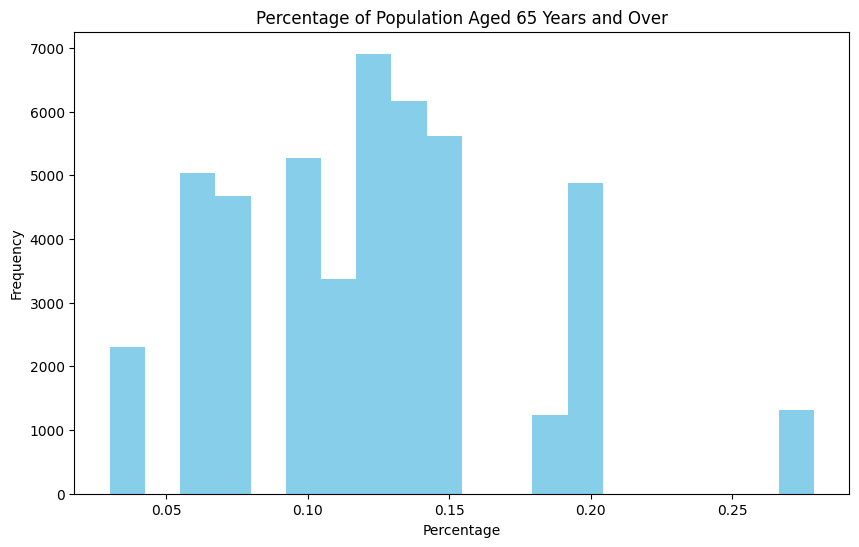

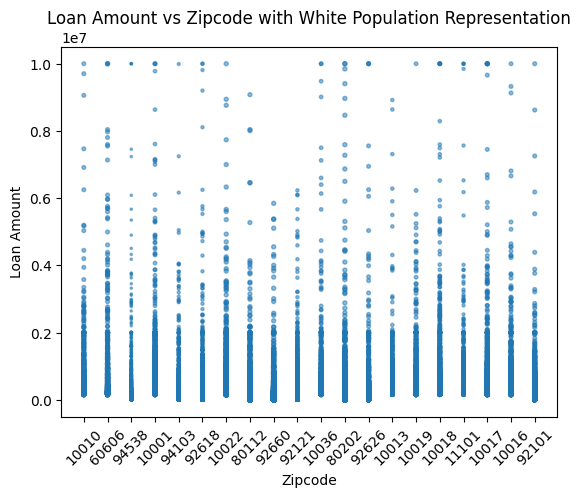

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms or scatterplots
plt.figure(figsize=(10, 6))

# Histogram of percentage of population aged 65 years and over
plt.hist(interesting_census_vars_pd["sex_and_age-percent-65_years_and_over-of-total_population"], bins=20, color='skyblue')
plt.title("Percentage of Population Aged 65 Years and Over")
plt.xlabel("Percentage")
plt.ylabel("Frequency")
plt.show()

import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(interesting_census_vars_pd["BorrowerZip"],
            interesting_census_vars_pd["CurrentApprovalAmount"],
            s=interesting_census_vars_pd["race-percent-one_race_white-of-total_population"] *10,
            alpha=0.5)
# plt.scatter(interesting_census_vars_pd["race-percent-one_race_white-of-total_population"],
#            interesting_census_vars_pd["CurrentApprovalAmount"], color='salmon', alpha=0.3)
plt.title("Loan Amount vs Zipcode with White Population Representation")
plt.xlabel("Zipcode")
plt.ylabel("Loan Amount")
plt.xticks(rotation=45)
y_axis_range = [0, 2000000]
#plt.tight_layout()
plt.show()




*   The histogram of the percentage of population aged 65 years and over can give us insights into the distribution of elderly population across the top 20 zip codes. We might observe whether there's a concentration of older populations in certain areas.


*   The scatterplot shows the relationship between the percentage of White population and the loan amount. This can help us understand if there's any correlation between the racial composition of a zip code and the loan amounts received through PPP. For example, we might observe whether zip codes with higher percentages of White population tend to receive larger loan amounts.



## (8) Optional extra credit for +10 points. What are the Top 10 zipcodes that had the highest per capita amount of loans going to Women-Owned businesses?

This column is called `Gender` in the `PPP` data.

* What State are these zipcodes in?
* Comment on if they have anything in common?

In [52]:
# calculate the loan amount going to women-owned businesses in a zipcode
women_owned_df = (
    df.filter(col("Gender") == "Female Owned") # Filter for records where the gender is female
    .groupBy("BorrowerZip") # group by zipcode
    .agg(sum("CurrentApprovalAmount") # aggregate the loan amount borrowed by women in a zipcode
    .alias("TotalLoanAmount")) # rename the aggregated column as TotalLoanAmount
)

# calculate the female population in a zipcode
pop_df = (
    df.groupBy('BorrowerZip') # group by zipcode
    .agg(sum('sex_and_age-population-total_population').cast("float") # aggregate the population in a zipcode
    .alias('total_population')) # rename the aggregated column as total_population
)


In [54]:
# Join women_owned_df and pop_df and calculate per capita loan amount
loans_per_capita = (
    women_owned_df.join(pop_df, "BorrowerZip", how="inner")  # Join on zipcode using inner join
    .withColumn("LoanPerCapita", col("TotalLoanAmount") / col("total_population"))  # Calculate per capita loan amount
)

# Show the resulting dataframe
loans_per_capita.show(5)

+-----------+-----------------+----------------+-------------------+
|BorrowerZip|  TotalLoanAmount|total_population|      LoanPerCapita|
+-----------+-----------------+----------------+-------------------+
|      02053|         898395.5|        485995.0| 1.8485694297266433|
|      02090|    6045648.46875|       1290576.0|  4.684457535821215|
|      03904|         306067.0|        310323.0| 0.9862852576186747|
|      06382| 1954108.33203125|       1835820.0|  1.064433513106541|
|      06518|3208282.091796875|       8325603.0|0.38535131831254443|
+-----------+-----------------+----------------+-------------------+
only showing top 5 rows



In [55]:

zip_to_state = df.select("BorrowerZip", "BorrowerState").distinct()
top_loans_per_capita_with_state = loans_per_capita.join(zip_to_state, "BorrowerZip")

# Find the top 10 zip codes with the highest per capita loan amount
top_10_zipcodes = top_loans_per_capita_with_state.orderBy(F.desc("LoanPerCapita")).limit(10)

# display the results
top_10_zipcodes.select("BorrowerZip", "BorrowerState", "LoanPerCapita").show()

+-----------+-------------+------------------+
|BorrowerZip|BorrowerState|     LoanPerCapita|
+-----------+-------------+------------------+
|      49434|           MI| 21447.85714285714|
|      89402|           NV|17463.985714285714|
|      98238|           WA|           13853.5|
|      55111|           MN|12432.472222222223|
|      58634|           ND| 9451.149425287356|
|      73520|           OK| 8274.149253731342|
|      66862|           KS| 6376.920634920635|
|      52657|           IA| 6204.109589041096|
|      73731|           OK| 5149.577777777778|
|      62622|           IL| 4799.776315789473|
+-----------+-------------+------------------+



# 🔴 Conclusion (5 pts)

## (1) What did you learn?
Write five detailed bullets about what you learned.





We learnt the following points in pyspark by doing this project.


*   First of all, We learnt the way of making first row as headers in both csv and text files and then how to join all the files rowwise(PPP data) and columnwise(census data).  
*   Secondly, we learnt how to drop null values in a variable and extract required digits in a string by using substr.
*   Furthermore, we mainly learnt how to convert the datatype of all the variables leaving exceptional variables(as per the requirement) using loops concept which is very much needed especially for big data where the count of number of columns is much higher(around 900).
*   Next, we learnt how to groupby and aggregate using a specific variable and then using sort, orderby and limit functions.
*   we learnt how to filter rows on a specific condition, double aggregation(as in the 6th question) and visualize our results in pyspark.


*   Finally, We learnt how to optimize our code and make it readable adding the comments



In addition, we got to know about many imported functions in pyspark and this project gave a valuable handson experience in pyspark dealing with huge amount of data.

# On Your Own (no credit)
No points - but can you download ALL files for PPP data (several gigabytes of data) and re-run this script with ease? Post on the discussion board if you do!